In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv(r"C:\Users\okechukwu chude\Documents\Neural Network\costomer-churn-rate-prediction\Churn_Modelling.csv")

In [4]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

Statistical Summary

In [7]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


HANDLING MISSING VALUES

In [8]:
dataset.isnull().values.sum()

0

ENCODING CATEGORICAL DATA

In [9]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [10]:
dataset =dataset.drop(columns= ['RowNumber',	'CustomerId', 'Surname'])

In [11]:
#to convert the test columns to numerical values
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to non-numerical columns
columns_to_encode = ["Geography","Gender"]

for column in columns_to_encode:
    dataset[column] = label_encoder.fit_transform(dataset[column])

In [12]:
dataset.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

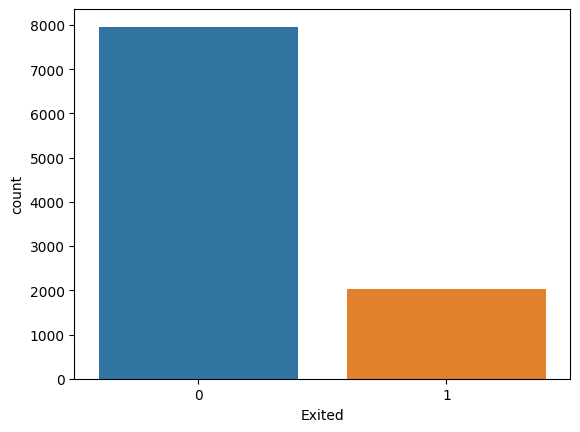

In [13]:
sns.countplot(x='Exited', data=dataset)
plt.plot

In [14]:
#churned customers
(dataset.Exited == 1).sum()

2037

CORRELATION MATRIX AND HEATMAP

In [15]:
dataset2 = dataset.drop(columns='Exited')

In [16]:
dataset2.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


<Axes: title={'center': 'Correlated with Exited'}>

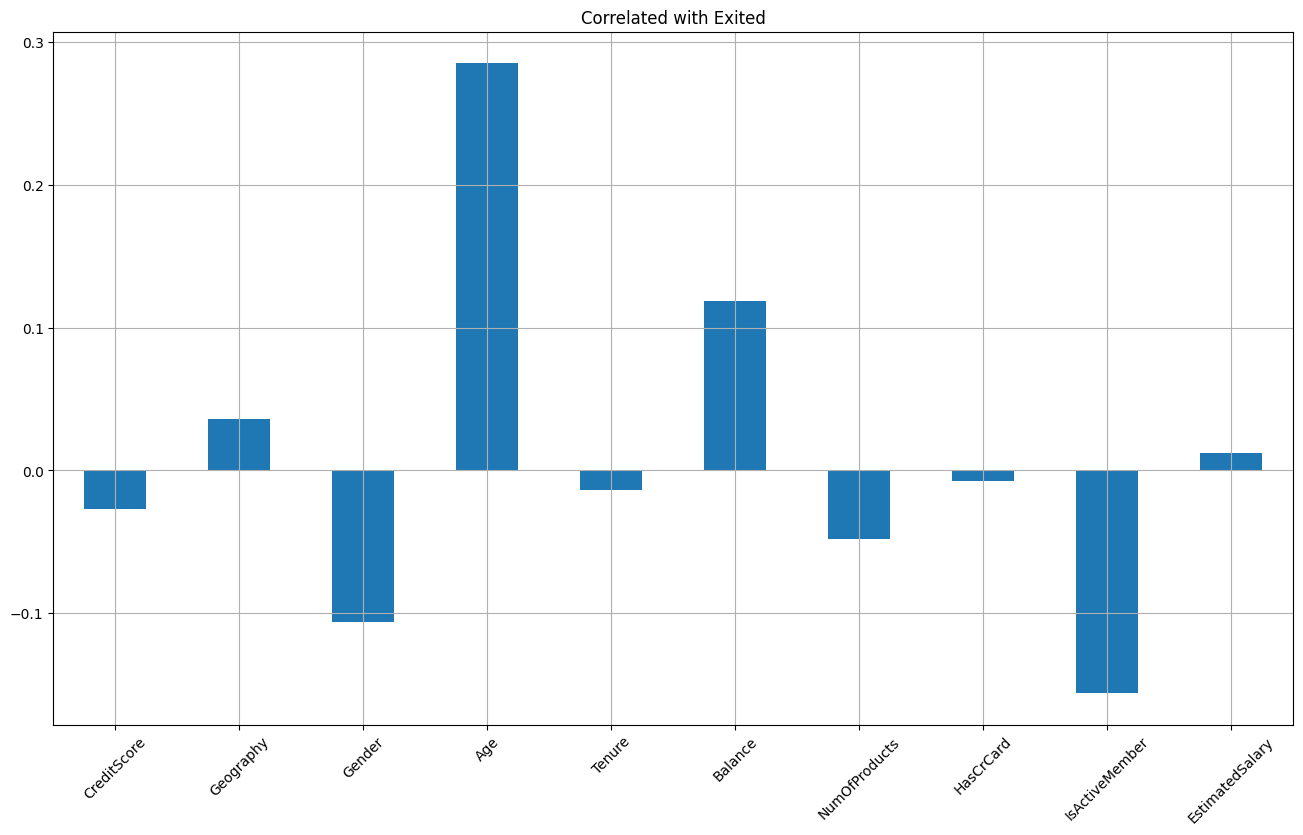

In [17]:
dataset2.corrwith(dataset['Exited']).plot.bar(
    figsize=(16,9), title= 'Correlated with Exited', rot = 45, grid= True)

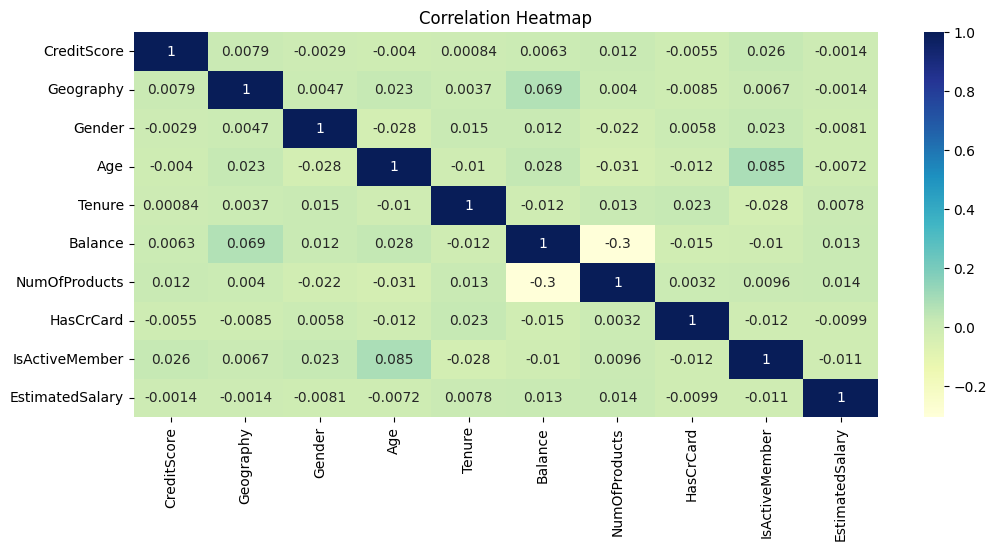

In [18]:
# Create a heat map
correlation_matrix = dataset2.corr()

# Plot the heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

SPLITTING THE DATA

In [19]:
x = dataset.drop(columns='Exited')
y =  dataset['Exited']

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3,random_state=42)

Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(xtrain,ytrain)

LogisticRegression(random_state=0)

In [24]:
ypred = lr.predict(xtest)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [30]:
acc = accuracy_score(ytest, ypred)
f1 = f1_score(ytest, ypred)
prec = precision_score(ytest, ypred)
rec = recall_score(ytest, ypred)

In [33]:
results = pd.DataFrame([['logistic regression', acc, f1, prec, rec]],
                      columns = ['Model', 'Acc','F1', 'Prec', 'Rec'])
results

,Model,Acc,F1,Prec,Rec
0,logistic regression,0.816667,0.268617,0.60119,0.172945


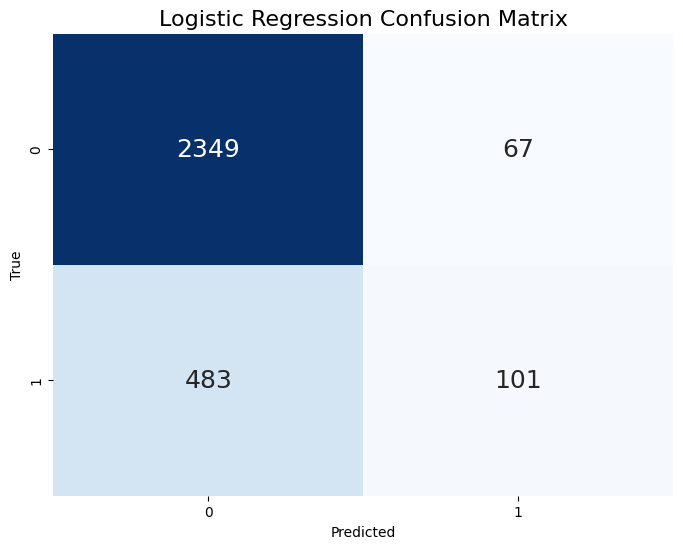

In [34]:
# Create the confusion matrix
cm_linreg = confusion_matrix(ytest, ypred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linreg, annot=True, fmt="d", cmap="Blues", cbar=False,annot_kws={"fontsize": 18})
plt.title("Logistic Regression Confusion Matrix", fontdict={"fontsize": 16})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator= lr, X= xtrain, y= ytrain, cv= 10)

In [37]:
print('Accuracy is {:.2f} %'.format(accuracy.mean()*100))
print('Standard dev is {:.2f} %'.format(accuracy.std()*100))

Accuracy is 80.33 %
Standard dev is 1.01 %
